In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import csv
from datetime import datetime
from datetime import timedelta
import random
#Modeling
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
import json
from sklearn.model_selection import GridSearchCV
from sklearn.svm import LinearSVR
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler
from tqdm import tqdm
#My mods:
from BTC_Trading_Algo import *

# Loading Data

<AxesSubplot:>

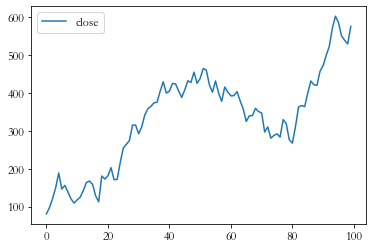

In [33]:
dummy_stock = {'date':[],'close':[]}
today = DATE('2021-01-01')
price_today = 100
for i in range(100):
    today = today + timedelta(days=1)
    price_today += random.normalvariate(10,30)
    dummy_stock['date'].append( str(today) ) 
    dummy_stock['close'].append(price_today)
df_dummy = pd.DataFrame(dummy_stock)
df_dummy.plot()

In [2]:
#df_dummy.to_csv('df_dummy.csv')
df_dummy = pd.read_csv('df_dummy.csv')


100%|██████████| 100/100 [00:00<00:00, 399.52it/s]


cannot convert the series to <class 'float'>
Tmr 2021-04-12 not found...


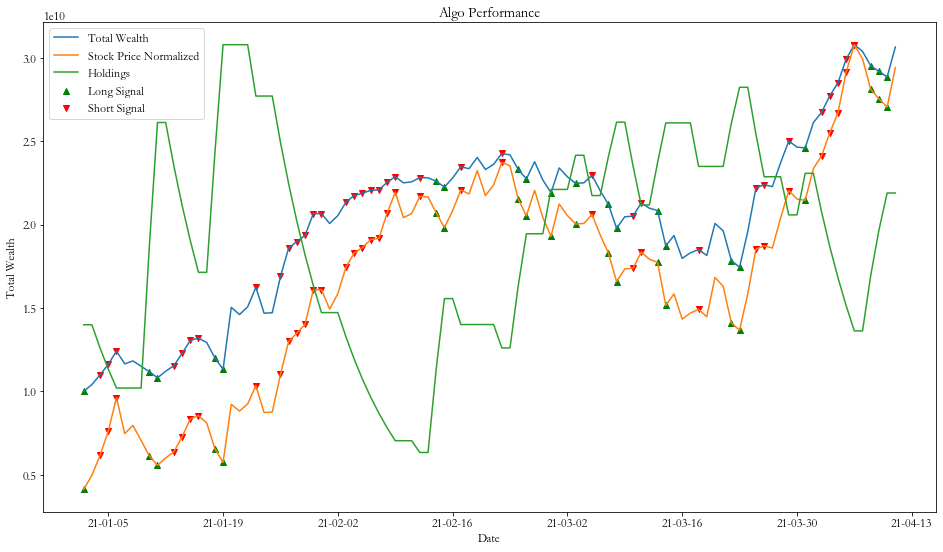

In [3]:
CT = Cheater(df_dummy,n_days=2,predict=False)
t = BackTester('df_dummy.csv',initial_wealth = 1e10)
t.start(CT.send_signal)
result = t.total_wealth['tot_wealth'][-1]
fig = t.Plot_history()

100%|██████████| 100/100 [00:00<00:00, 434.33it/s]


cannot convert the series to <class 'float'>
Tmr 2021-04-12 not found...


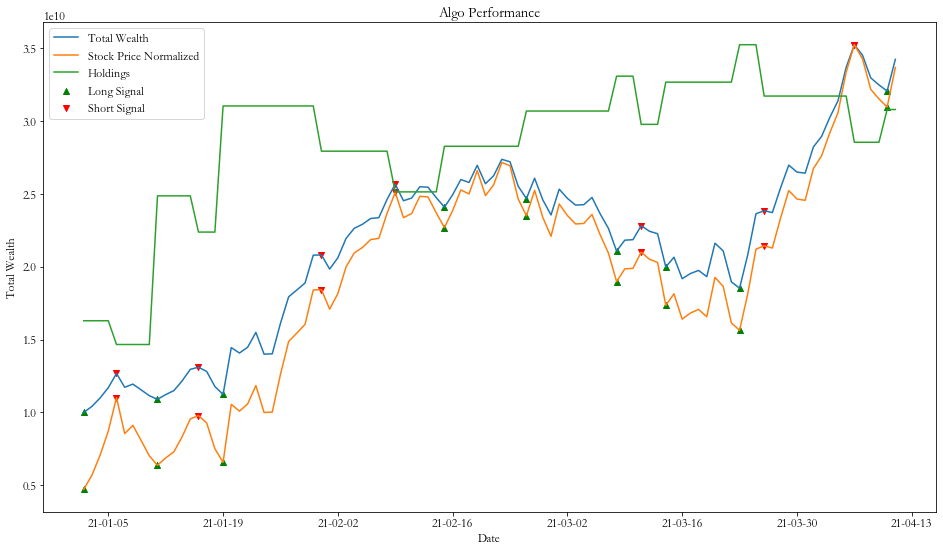

In [6]:
CT = Cheater(df_dummy,n_days=3,predict=True)
t = BackTester('df_dummy.csv',initial_wealth = 1e10)
t.start(CT.send_signal)
result = t.total_wealth['tot_wealth'][-1]
fig = t.Plot_history()

In [9]:
df_all = pd.read_csv('BTC_TWT_GC.csv')
df_pre2020 = df_all.query('date < "2020-01-01"')
df_Post2020 = df_all.query('date >= "2020-01-01"')
df_Post2020.to_csv('df_Post2020.csv')

df_pre_bull =  df_all.query('date >= "2021-07-01"')
df_post_bull =  df_all.query('date >= "2021-07-01"')
df_post_bull.to_csv('df_post_bull.csv')

df_pre_bear =  df_all.query('date  >= "2021-04-01"')
df_post_bear =  df_all.query('date  >= "2021-04-01"')
df_post_bear.to_csv('df_post_bear.csv')

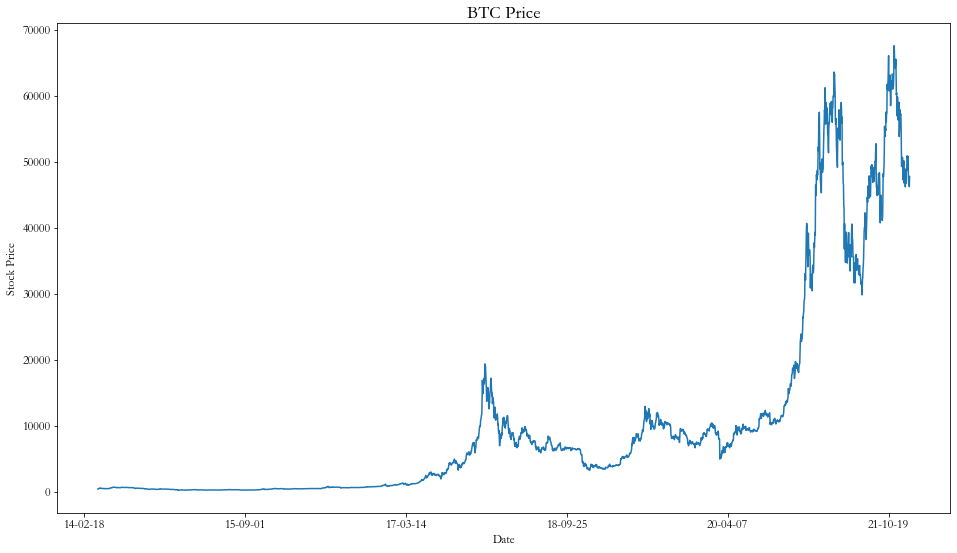

In [10]:
import matplotlib as mpl
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter
#
fig, ax = plt.subplots(figsize=(16, 9))
price_move = list(df_all.close)
ax.plot([DATE(d) for d in df_all.date],price_move)#<-------BTC
font = {'size'   : 15}

mpl.rc('font', **font)

ax.set(xlabel="Date", ylabel="Stock Price",title="BTC Price")
# Format the x axis
ax.xaxis.set_major_locator(mdates.WeekdayLocator(interval=max(1,int(df_all.shape[0]/35))))
ax.xaxis.set_major_formatter(DateFormatter("%y-%m-%d"))

# Testing

In [11]:
    
#Initialize all conditions
data_frames = ['df_Post2020.csv','df_post_bull.csv','df_post_bear.csv']
models = {
        'GradientBoostingRegressor':GradientBoostingRegressor(min_samples_split=20),
        'DecisionTreeRegressor':DecisionTreeRegressor(min_samples_leaf=10, min_samples_split=5)}
    

100%|██████████| 731/731 [00:02<00:00, 318.55it/s]


cannot convert the series to <class 'float'>
Tmr 2022-01-01 not found...


100%|██████████| 731/731 [00:02<00:00, 352.13it/s]


cannot convert the series to <class 'float'>
Tmr 2022-01-01 not found...
Executing:TwT|GradientBoostingRegressor


100%|██████████| 731/731 [00:59<00:00, 12.31it/s]


Executing:TwT|DecisionTreeRegressor


100%|██████████| 184/184 [00:00<00:00, 312.66it/s]
c:\Users\18066\OneDrive\Data Science\Msca\Realtime\Final_project\BTC_Trading_Algo.py:32: RuntimeWarning: invalid value encountered in true_divide
  return value*(_Lst/_Lst.max())


cannot convert the series to <class 'float'>
Tmr 2022-01-01 not found...


100%|██████████| 184/184 [00:00<00:00, 292.26it/s]


cannot convert the series to <class 'float'>
Tmr 2022-01-01 not found...
Executing:TwT|GradientBoostingRegressor


100%|██████████| 184/184 [00:06<00:00, 29.01it/s]


Executing:TwT|DecisionTreeRegressor


100%|██████████| 275/275 [00:00<00:00, 302.52it/s]


cannot convert the series to <class 'float'>
Tmr 2022-01-01 not found...


100%|██████████| 275/275 [00:00<00:00, 343.09it/s]


cannot convert the series to <class 'float'>
Tmr 2022-01-01 not found...
Executing:TwT|GradientBoostingRegressor


100%|██████████| 275/275 [00:10<00:00, 25.20it/s]


Executing:TwT|DecisionTreeRegressor


100%|██████████| 275/275 [00:01<00:00, 153.89it/s]


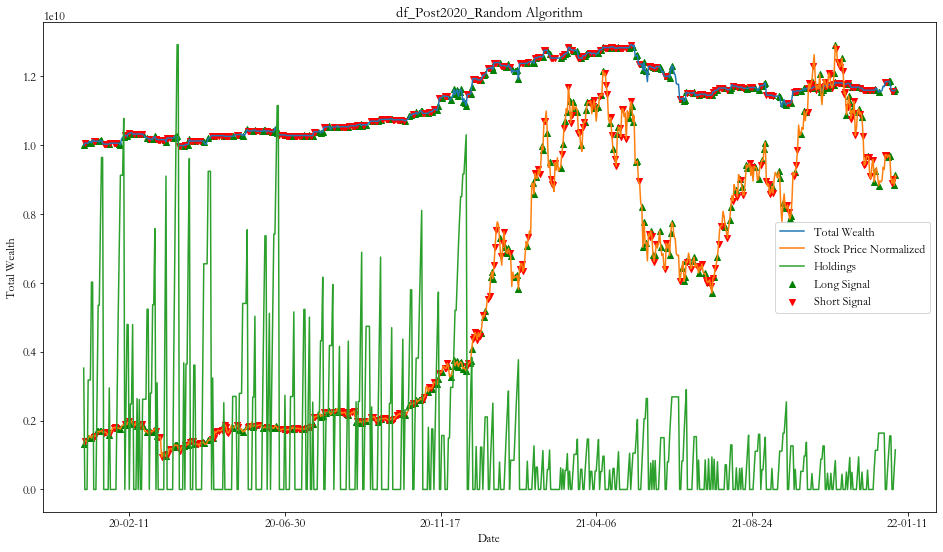

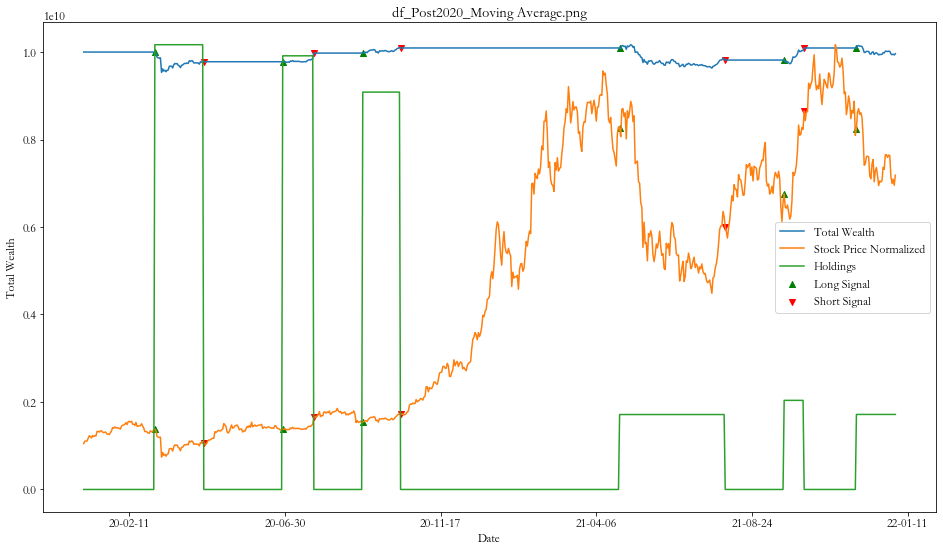

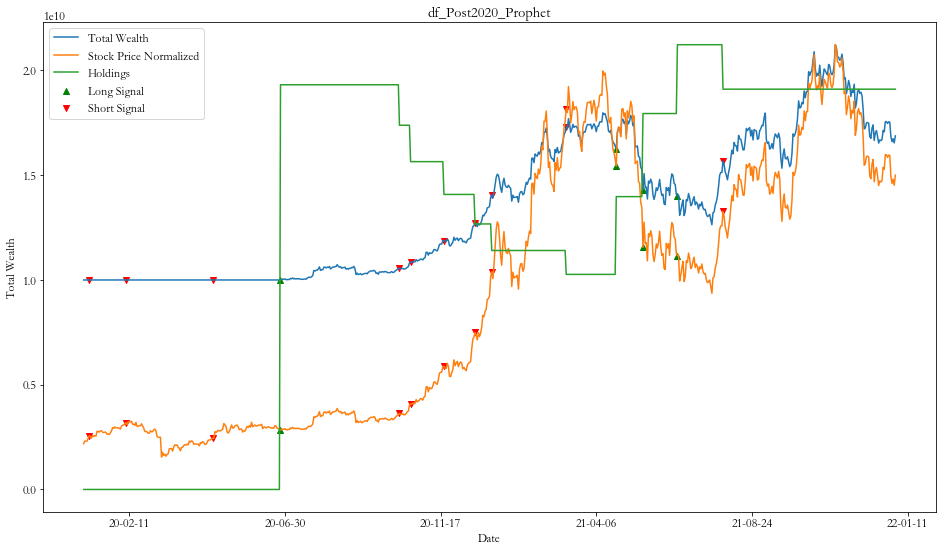

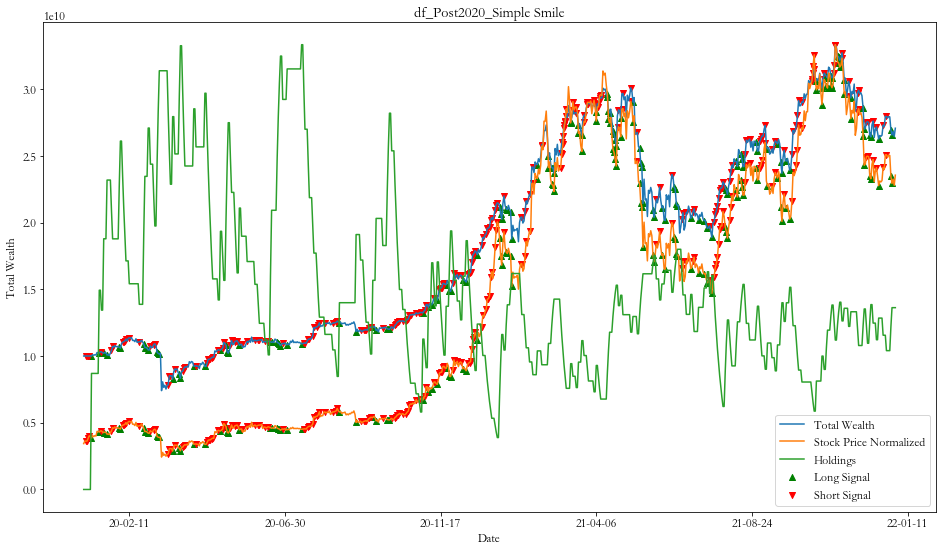

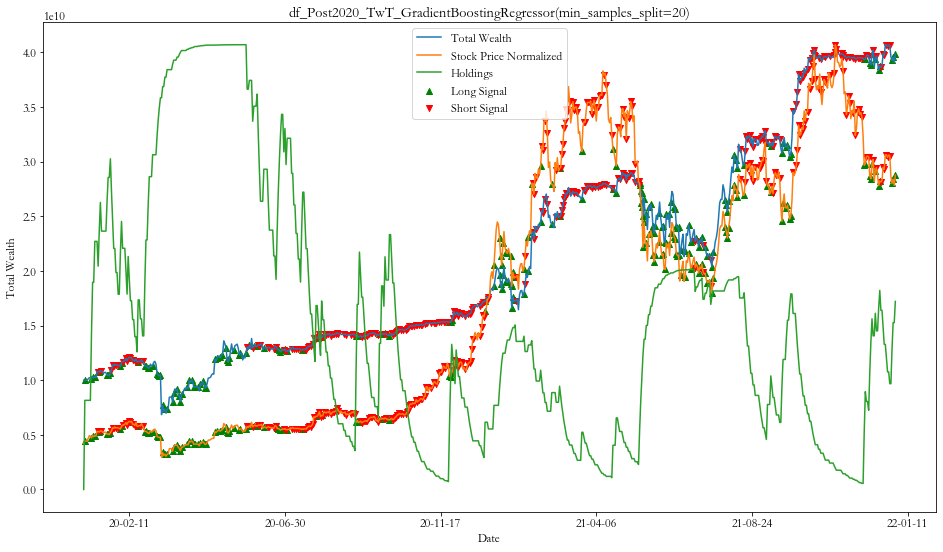

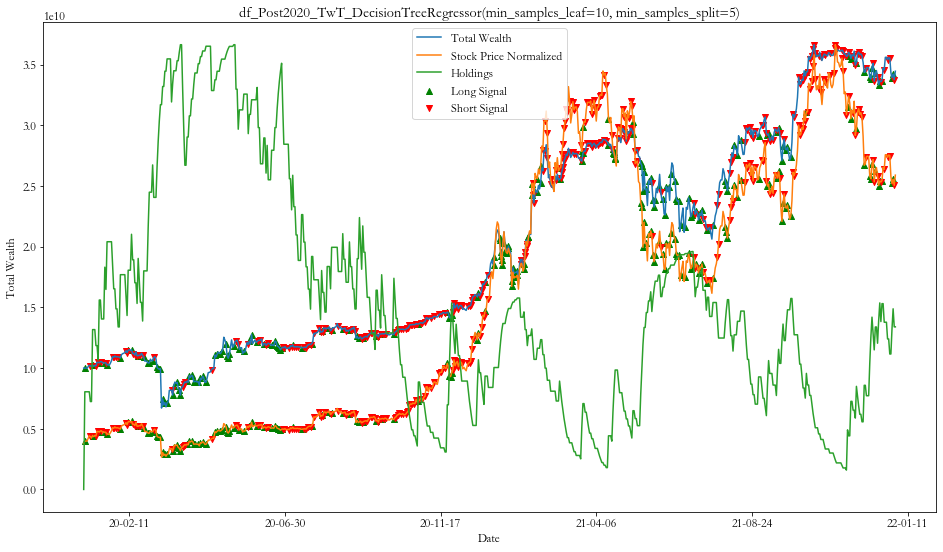

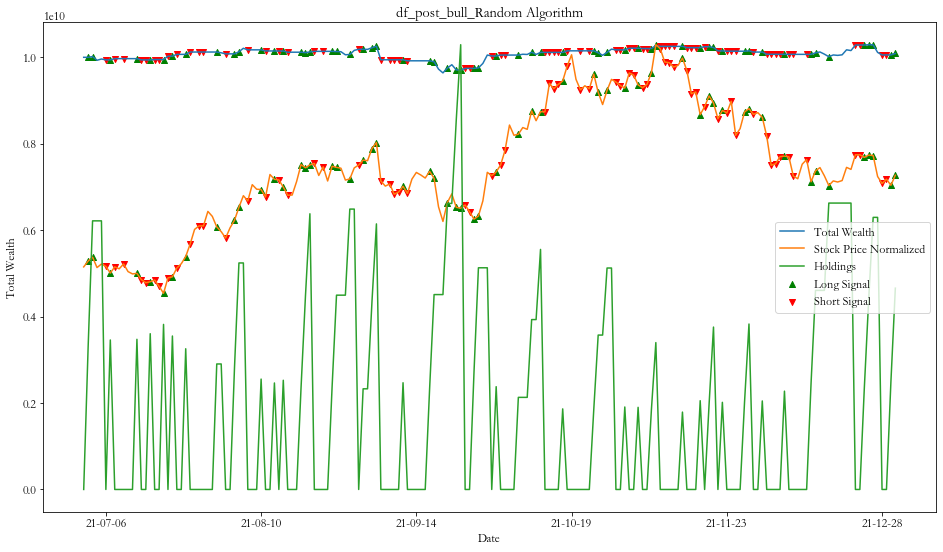

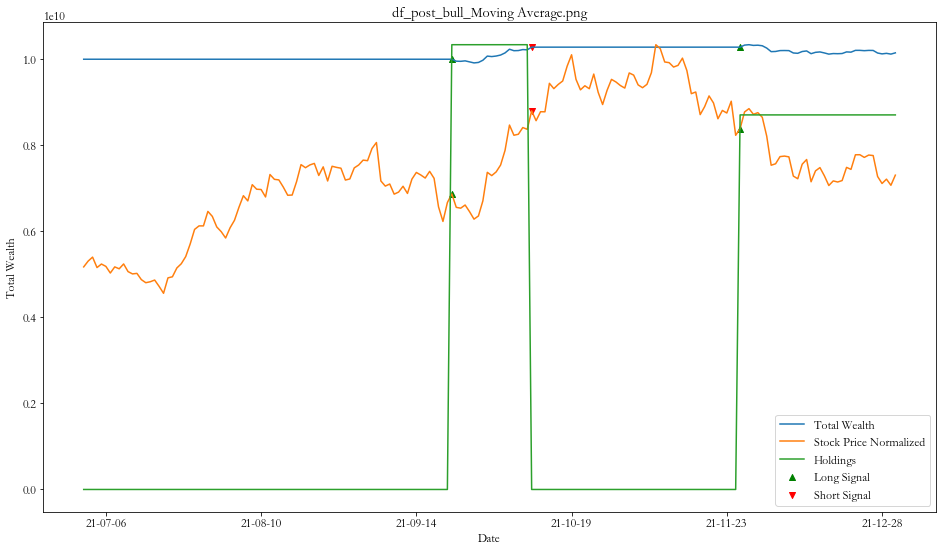

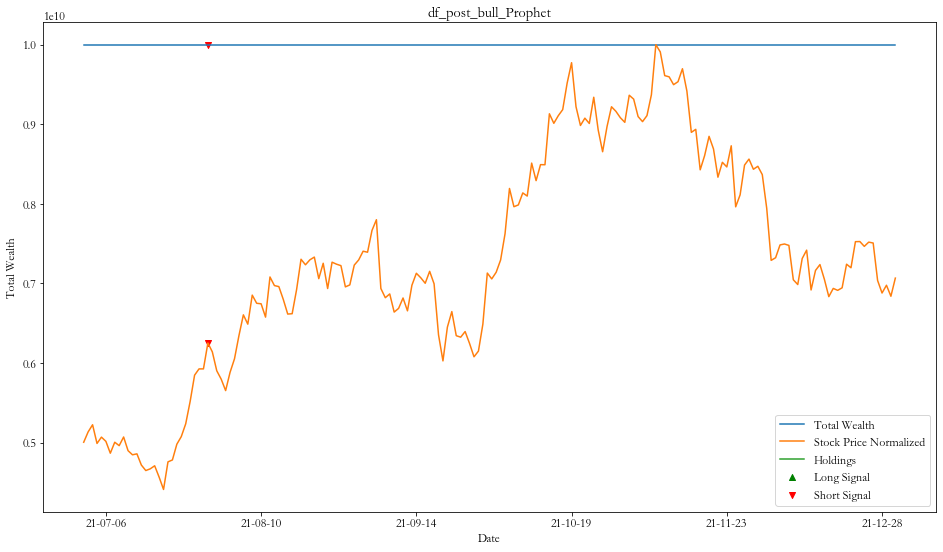

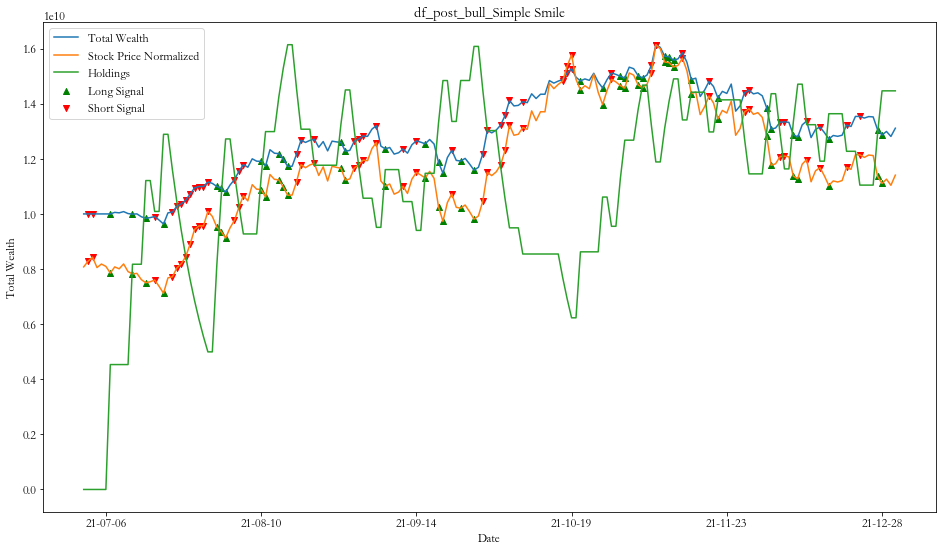

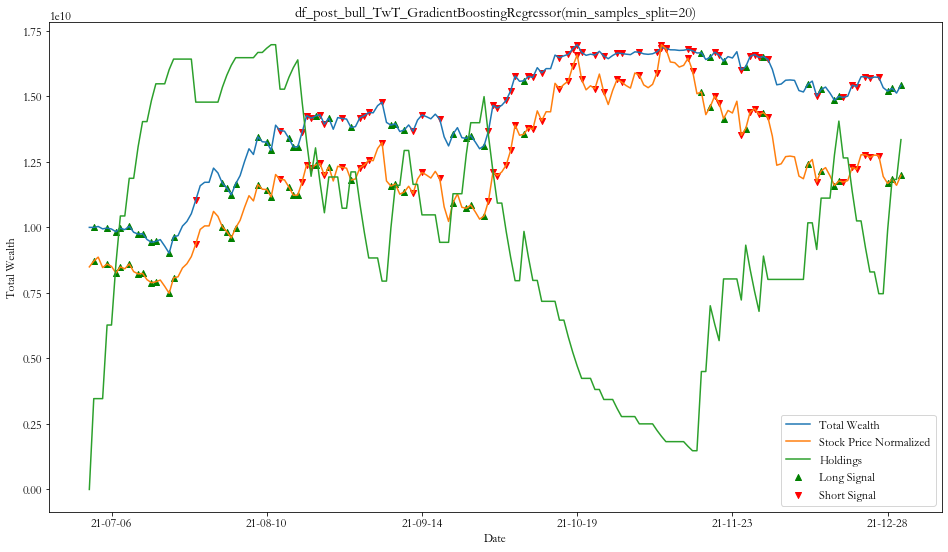

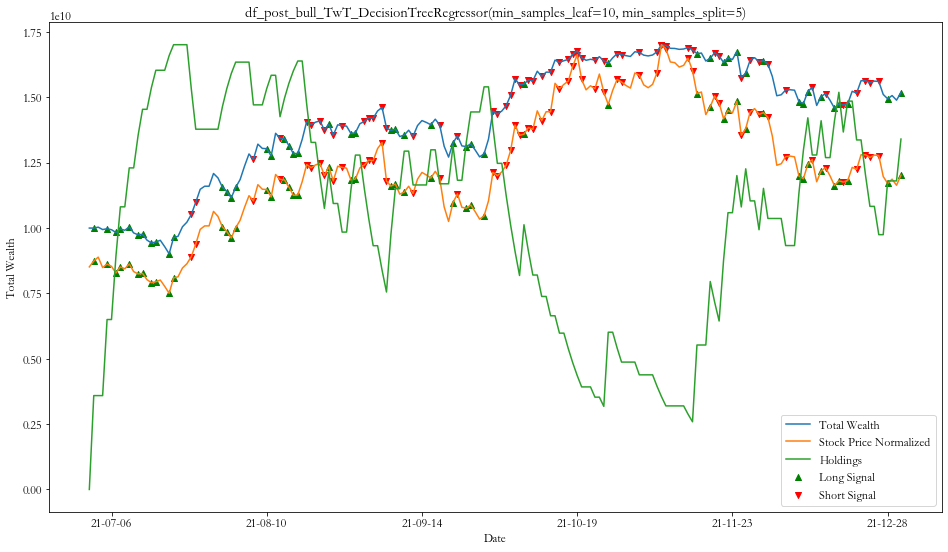

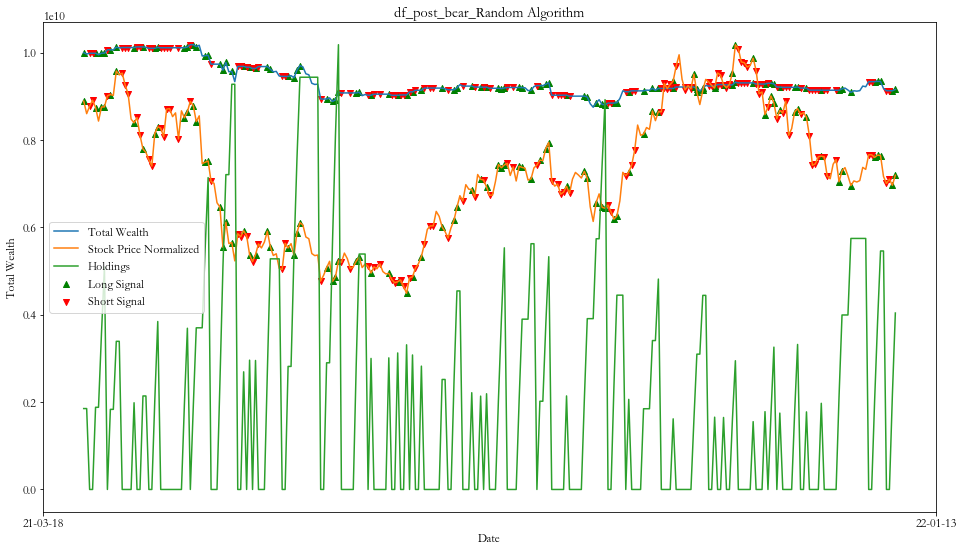

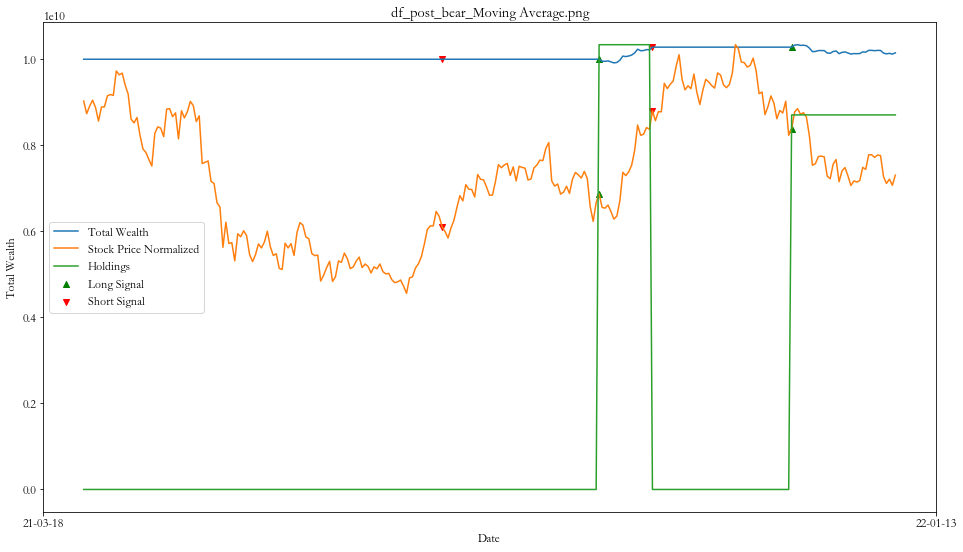

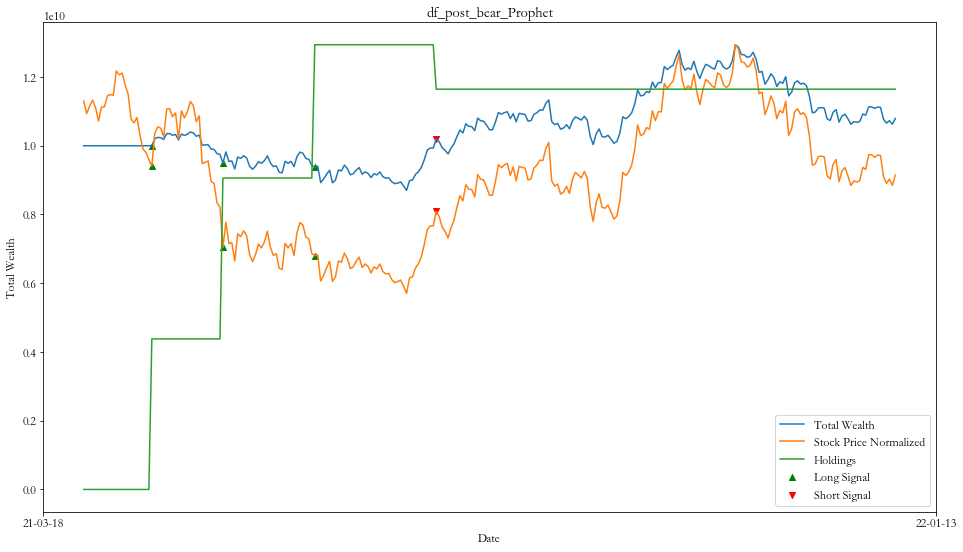

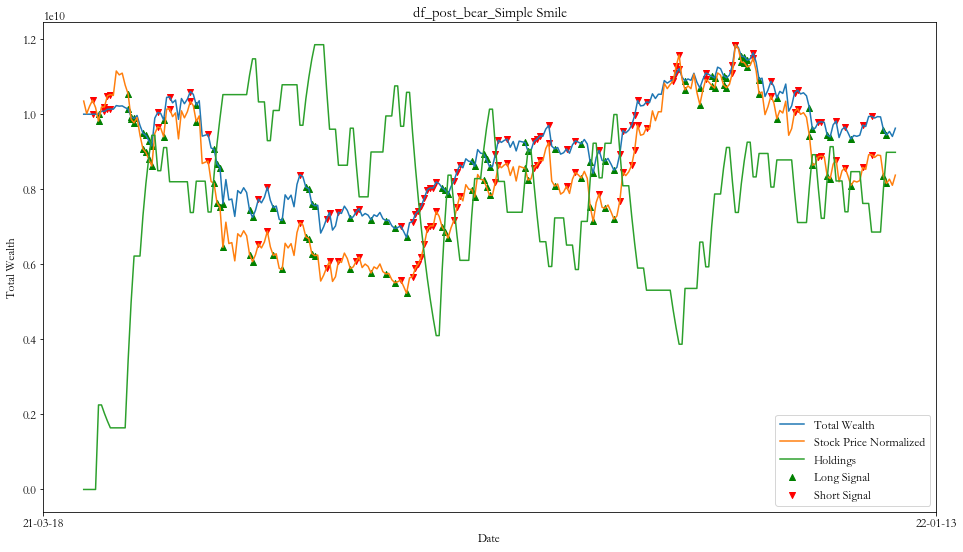

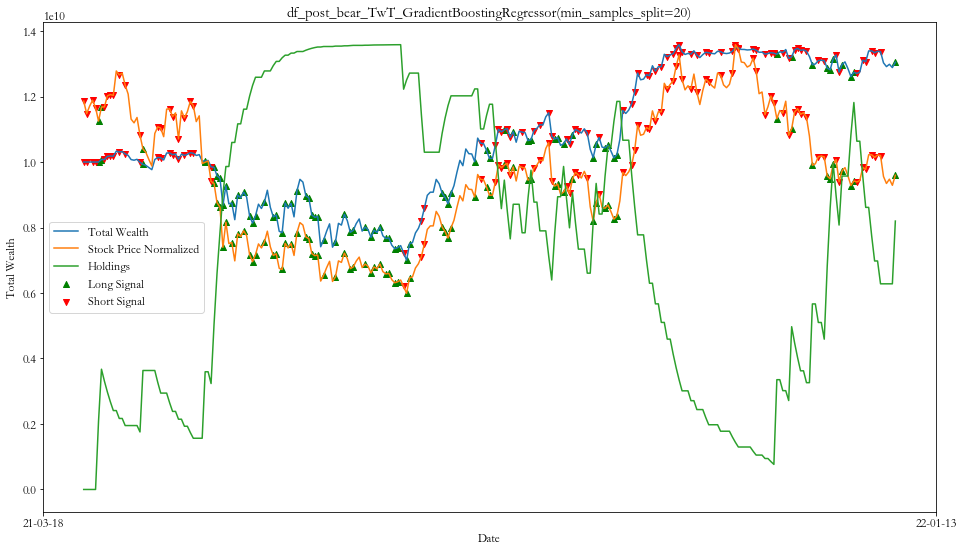

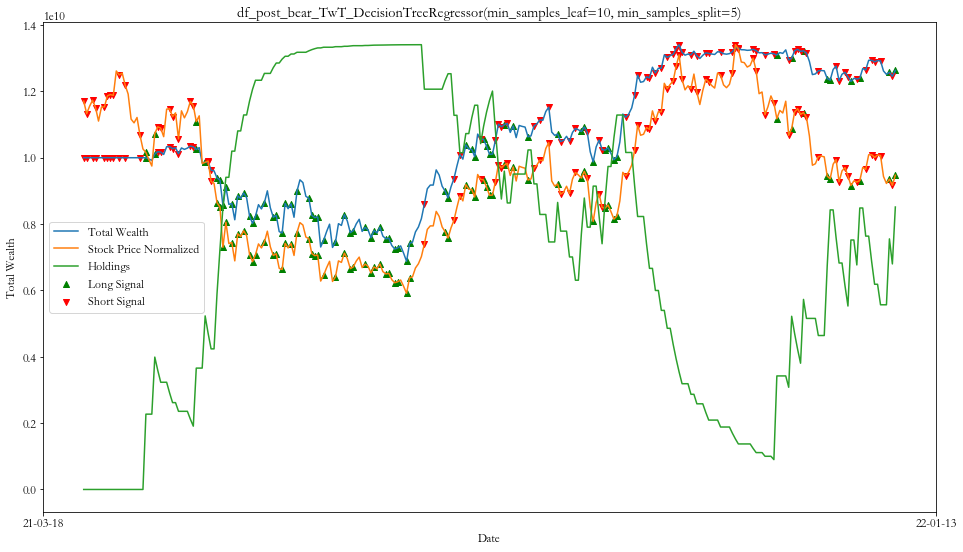

In [12]:
#Capture Results 
Results = {'random algo':[],'moving avg':[],'prophet':[],'pure smile':[]}
for df_path in data_frames:
    df = pd.read_csv(df_path,index_col=0)
    time_frame = df_path.split('.')[0]
    t = BackTester(df_path,initial_wealth = 1e10) #Initialize the BackTesting system
    #Base Line:
    #1.Random Algorithm:
    t.start(Random_algo)
    result = t.total_wealth['tot_wealth'][-1]
    fig = t.Plot_history()
    plt.title(f"{time_frame}_Random Algorithm")
    plt.savefig(f"{time_frame}_Random Algorithm.png",format ='png',dpi=600)
    Results['random algo'].append(result)
    #2.Moving Avg Algorithm:
    MA = Moving_Avg()
    t.start(Trading_Strat = MA.send_signal)#Running the algorithm as the input
    result = t.total_wealth['tot_wealth'][-1]
    fig = t.Plot_history()
    plt.title(f"{time_frame}_Moving Average.png")
    plt.savefig(f"{time_frame}_Moving Average.png",format ='png',dpi=600)
    Results['moving avg'].append(result)
    #3.Cheater Algorithm
    CT = Cheater(df_all,n_days=5)
    t.start(CT.send_signal)
    result = t.total_wealth['tot_wealth'][-1]
    fig = t.Plot_history()
    plt.title(f"{time_frame}_Prophet")
    plt.savefig(f"{time_frame}_Prophet.png",format ='png',dpi=600)
    Results['prophet'].append(result)
    #4.Smile Algorithm
    CT = Cheater(df_all,n_days=2,predict=False)
    t.start(CT.send_signal)
    result =t.total_wealth['tot_wealth'][-1]
    fig = t.Plot_history()
    plt.title(f"{time_frame}_Simple Smile")
    plt.savefig(f"{time_frame}_Simple Smile.png",format ='png',dpi=600)
    Results['pure smile'].append(result)
    #5.Actual Model 
    for model_name in models:
        name = f'TwT|{model_name}'
        print(f'Executing:{name}')
        model = models[model_name]
        Twt = TWT_BTC(df,model = model,
                        use_hist_price=False ,shreshold = 0.05,fraction_long=0.2,fraction_short = 0.1,n_days=2,
                        Smile_Principle = True)
        t.start(Twt.send_signal)
        result = t.total_wealth['tot_wealth'][-1]
        fig = t.Plot_history()
        plt.title(f'{time_frame}_TwT_{model}')
        plt.savefig(f"{time_frame}_TwT_{model}.png",format ='png',dpi=600)
        if name not in Results:
            Results[name] = [result]
        else:
            Results[name].append(result)

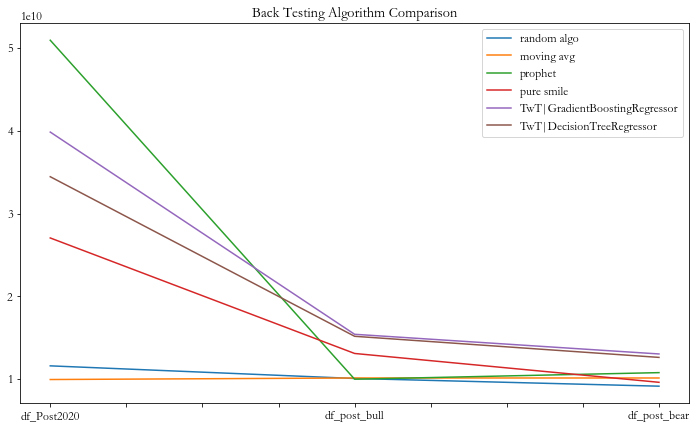

In [34]:
pd.DataFrame(Results,index = [i.split('.')[0] for i in data_frames]).plot(figsize=(12,7))
plt.title('Back Testing Algorithm Comparison')
plt.savefig('Model Contrast.png',format='png',dpi=600)

100%|██████████| 731/731 [00:01<00:00, 367.44it/s]


cannot convert the series to <class 'float'>
Tmr 2022-01-01 not found...


100%|██████████| 731/731 [00:02<00:00, 340.83it/s]


cannot convert the series to <class 'float'>
Tmr 2022-01-01 not found...


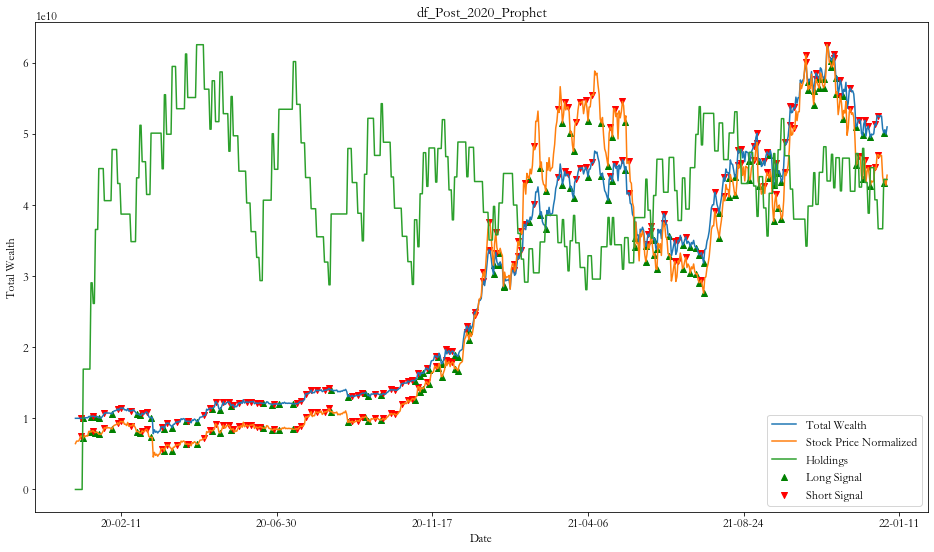

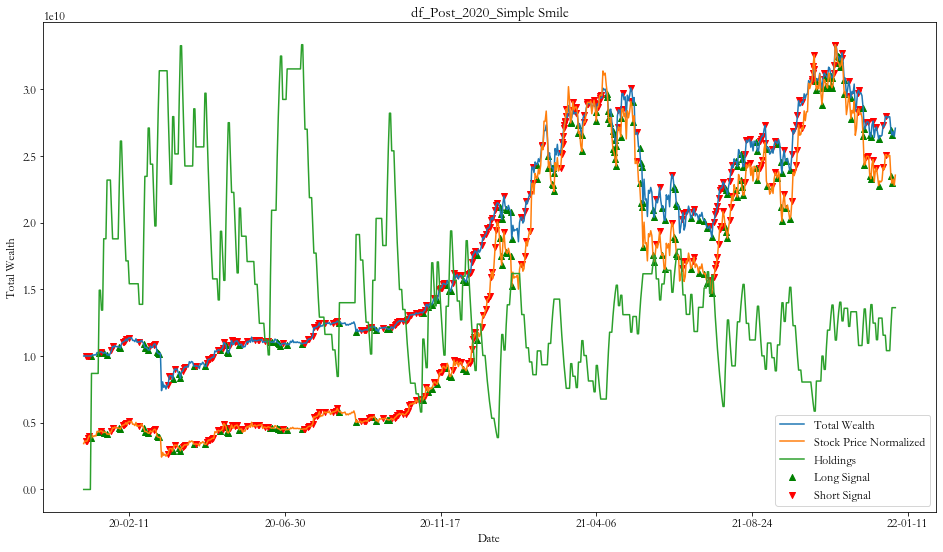

In [36]:
t = BackTester(data_frames[0],initial_wealth = 1e10)
#
time_frame = 'df_Post_2020'
CT = Cheater(df_all,n_days=2)
t.start(CT.send_signal)
fig = t.Plot_history()
plt.title(f"{time_frame}_Prophet")
plt.savefig(f"{time_frame}_Prophet.png",format ='png',dpi=600)
#4.Smile Algorithm
CT = Cheater(df_all,n_days=2,predict=False)
t.start(CT.send_signal)
fig = t.Plot_history()
plt.title(f"{time_frame}_Simple Smile")
plt.savefig(f"{time_frame}_Simple Smile.png",format ='png',dpi=600)